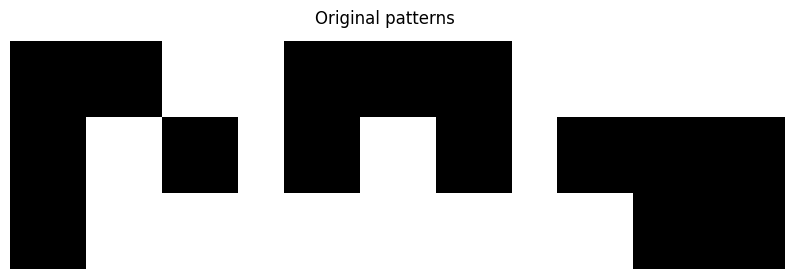

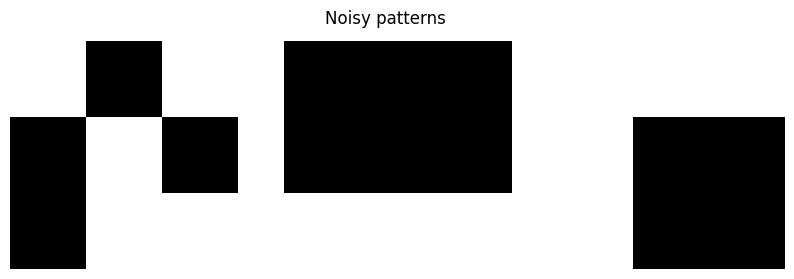

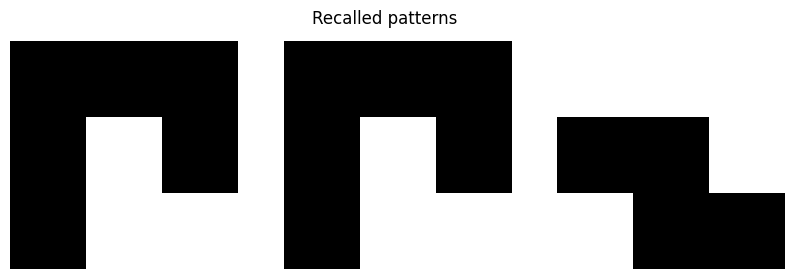

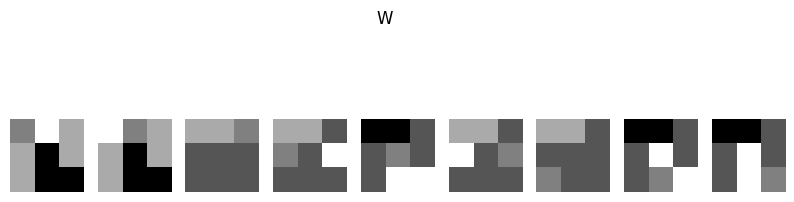

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 패턴을 정의합니다.
patterns = np.array([[-1, -1,  1, -1,  1, -1, -1,  1,  1],
                     [-1, -1, -1, -1,  1, -1,  1,  1,  1],
                     [ 1,  1,  1, -1, -1, -1,  1, -1, -1]])

# 가중치 행렬을 계산합니다.
def train(patterns):
    n_patterns, n_neurons = patterns.shape
    W = np.zeros((n_neurons, n_neurons))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / n_patterns

# 시뮬레이션 과정을 정의합니다.
def recall(W, patterns, n_iterations):
    recalled_patterns = []
    for pattern in patterns:
        recalled = pattern.copy()
        for _ in range(n_iterations):
            recalled = np.sign(np.dot(W, recalled))
        recalled_patterns.append(recalled)
    return np.array(recalled_patterns)

# 홉필드 네트워크를 학습시킵니다.
W = train(patterns)

# 노이즈가 섞인 패턴을 정의합니다.
noisy_patterns = np.array([[ 1, -1,  1, -1,  1, -1, -1,  1,  1],
                           [-1, -1, -1, -1, -1, -1,  1,  1,  1],
                           [ 1,  1,  1,  1, -1, -1,  1, -1, -1]])

# 노이즈가 섞인 패턴을 복원합니다.
recalled_patterns = recall(W, noisy_patterns, 5)

# 결과를 시각화합니다.
def plot_patterns(patterns, title):
    fig, axes = plt.subplots(1, len(patterns), figsize=(10, 3))
    fig.suptitle(title)
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern.reshape(3, 3), cmap='gray', vmin=-1, vmax=1)
        ax.axis('off')


plot_patterns(patterns, 'Original patterns')
plot_patterns(noisy_patterns, 'Noisy patterns')
plot_patterns(recalled_patterns, 'Recalled patterns')
plot_patterns(W,'W')
plt.show()


홉필드 네트워크를 파이썬으로 구현하고 시각화하는 예제를 제공합니다. 이 코드는 간단한 3x3 패턴을 저장하고 복원하는 홉필드 네트워크를 구현한 것입니다.
이 코드를 실행하면 홉필드 네트워크가 노이즈가 섞인 패턴을 원래 패턴으로 복원하는 것을 시각화할 수 있습니다. 이 예제는 간단한 경우이며, 더 큰 패턴이나 더 많은 패턴을 저장하고자 할 경우 코드를 적절히 수정해야 합니다.



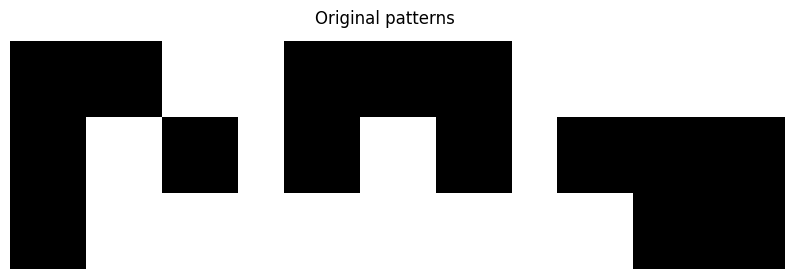

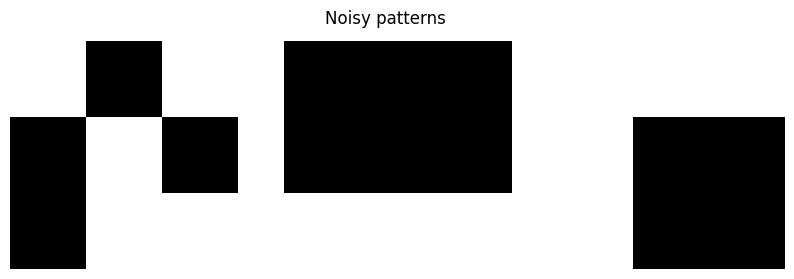

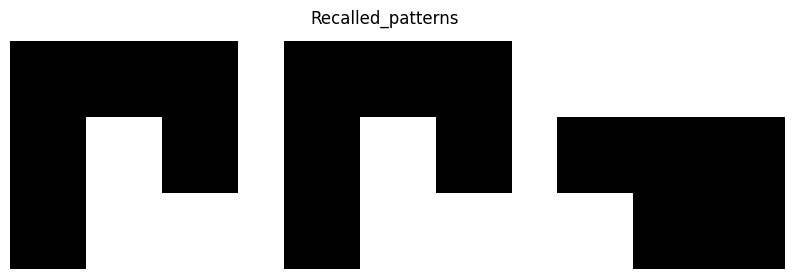

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 패턴을 정의합니다.
patterns = np.array([[-1, -1,  1, -1,  1, -1, -1,  1,  1],
                     [-1, -1, -1, -1,  1, -1,  1,  1,  1],
                     [ 1,  1,  1, -1, -1, -1,  1, -1, -1]])

# 가중치 행렬을 계산합니다.
def train(patterns):
    n_patterns, n_neurons = patterns.shape
    W = np.zeros((n_neurons, n_neurons))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / n_patterns

# 시뮬레이션 과정을 정의합니다.
def recall(W, patterns, n_iterations, random_order=True):
    recalled_patterns = []
    for pattern in patterns:
        recalled = pattern.copy()
        for _ in range(n_iterations):
            if random_order:
                update_order = np.random.permutation(len(recalled))
            else:
                update_order = range(len(recalled))
            for i in update_order:
                recalled[i] = np.sign(np.dot(W[i], recalled))
        recalled_patterns.append(recalled)
    return np.array(recalled_patterns)

# 홉필드 네트워크를 학습시킵니다.
W = train(patterns)

# 노이즈가 섞인 패턴을 정의합니다.
noisy_patterns = np.array([[ 1, -1,  1, -1,  1, -1, -1,  1,  1],
                           [-1, -1, -1, -1, -1, -1,  1,  1,  1],
                           [ 1,  1,  1,  1, -1, -1,  1, -1, -1]])

# 노이즈가 섞인 패턴을 복원합니다.
recalled_patterns = recall(W, noisy_patterns, 100)

# 결과를 시각화합니다.
def plot_patterns(patterns, title):
    fig, axes = plt.subplots(1, len(patterns), figsize=(10, 3))
    fig.suptitle(title)
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern.reshape(3, 3), cmap='gray', vmin=-1, vmax=1)
        ax.axis('off')

plot_patterns(patterns, 'Original patterns')
plot_patterns(noisy_patterns, 'Noisy patterns')
plot_patterns(recalled_patterns, 'Recalled_patterns')
plt.show()


제공된 예제에서 패턴 복원이 완벽하지 않을 수 있습니다. 이는 홉필드 네트워크의 한계와 노이즈가 많은 경우에 복원이 어려울 수 있기 때문입니다. 하지만 여기에 몇 가지 개선을 적용해 볼 수 있습니다. 홉필드 네트워크의 성능을 높이기 위해 비동기 업데이트를 사용하고, 업데이트 순서를 무작위로 바꾸어 보겠습니다.

위 코드는 홉필드 네트워크의 업데이트 과정에서 비동기 방식을 사용하고, 업데이트 순서를 무작위로 변경하여 패턴 복원 성능을 향상시키려는 시도입니다. 하지만 이 방법도 패턴 복원이 완벽하지 않을 수 있습니다. 패턴이 겹치거나 노이즈가 많은 경우에는 홉필드 네트워크의 성능이 제한됩니다.

더 나은 결과를 얻기 위해서는 패턴 저장 용량을 늘리거나, 다른 패턴 인식 및 복원 방법을 고려해 볼 수 있습니다. 예를 들어, 딥러닝 기반의 인공신경망이나 볼츠만 머신 등 다양한 기법들이 있습니다. 이러한 기법들은 더 많은 패턴을 저장하고 복잡한 패턴을 처리할 수 있는 능력을 가지고 있습니다.
